<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week6/day2/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
file_path = 'global_power_plant_database.csv'
data = pd.read_csv(file_path)

data.fillna(value=np.nan, inplace=True)

<ipython-input-2-ab68bfa530db>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
data['capacity_mw'] = pd.to_numeric(data['capacity_mw'], errors='coerce')
data['year_of_capacity_data'] = pd.to_numeric(data['year_of_capacity_data'], errors='coerce')


In [4]:
numerical_summary = data.describe()


In [6]:
country_distribution = data['country'].value_counts()
fuel_type_distribution = data['primary_fuel'].value_counts()

In [7]:
power_output_by_fuel = data.groupby('primary_fuel')['capacity_mw'].mean()


In [8]:
solar_power = data[data['primary_fuel'] == 'Solar']['capacity_mw'].dropna()
wind_power = data[data['primary_fuel'] == 'Wind']['capacity_mw'].dropna()
t_stat, p_val = stats.ttest_ind(solar_power, wind_power)


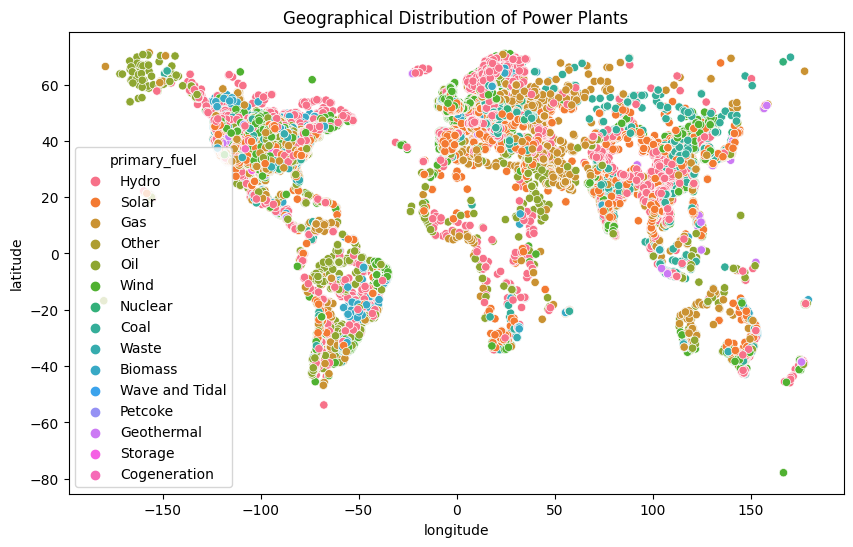

In [9]:
if 'year_of_capacity_data' in data.columns:
    fuel_type_over_time = data.groupby(['year_of_capacity_data', 'primary_fuel']).size().unstack().fillna(0)

if 'latitude' in data.columns and 'longitude' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=data)
    plt.title('Geographical Distribution of Power Plants')
    plt.show()


In [14]:
print("Numerical Summary:\n", numerical_summary)
print("Country Distribution:\n", country_distribution.head())
print("Fuel Type Distribution:\n", fuel_type_distribution.head())
print("Power Output by Fuel Type:\n", power_output_by_fuel)
print("Hypothesis Testing (Solar vs Wind): T-stat = {}, P-value = {}".format(t_stat, p_val))


Numerical Summary:
         capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.6